In [291]:
import csv
import skimage
from skimage import data
from numpy import array
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import os

from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils

In [2]:
import timeit

In [3]:
csv.register_dialect('myDialect',
delimiter = ',',
skipinitialspace=True)
trainImages=[]
trainLabels=[]
testImages=[]
testLabels=[]
with open('trainVal.csv','r') as csvFile:
    reader = csv.reader(csvFile,dialect='myDialect')
    for row in reader:
        if row[3]=='1':
            img=skimage.data.imread(row[1])
            img = skimage.transform.resize(img,(40,200,3))
            
            
            #### face different length of license
            x_trainLabel=str(row[2])
            if len(x_trainLabel)==7:
                trainImages.append(img)
                trainLabels.append(x_trainLabel[0:3]+'#'+x_trainLabel[3:])
            if len(x_trainLabel)==6:
                trainImages.append(img)
                trainLabels.append(x_trainLabel[0:3]+'..'+x_trainLabel[3:])
            if len(x_trainLabel)==5:
                trainImages.append(img)
                trainLabels.append(x_trainLabel[0]+'###'+x_trainLabel[1:])
                
#         if row[3]=='0':
#             img=skimage.data.imread(row[1])
#             img = skimage.transform.resize(img,(40,200,3))
            
            
#             x_testLabel=str(row[2])
#             if len(x_testLabel)==7:
#                 testImages.append(img)
#                 testLabels.append(x_testLabel[0:3]+'#'+x_testLabel[3:])
#             if len(x_testLabel)==6:
#                 testImages.append(img)
#                 testLabels.append(x_testLabel[0:3]+'..'+x_testLabel[3:])
#             if len(x_trainLabel)==5:
#                 testImages.append(img)
#                 testLabels.append(x_testLabel[0]+'###'+x_testLabel[1:])
        
        #print(row,row[3])
        

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [4]:
len(trainImages),len(trainLabels)

(105671, 105671)

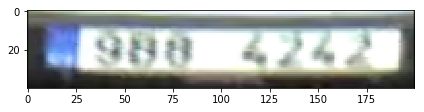

In [5]:
skimage.io.imshow(trainImages[100001])

In [6]:
trainLabels[100001]

'9B8#4242'

In [7]:
# len(testLabels),len(testImages)

In [8]:
# skimage.io.imshow(testImages[10001])

In [9]:
# testLabels[10001]

Using TensorFlow backend.


In [8]:
# define universe of possible input values
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz#. '.upper()

In [9]:
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [13]:
len(alphabet)

39

In [14]:
#len(testLabels)

In [10]:
#print how many license less than 8 characters
i=0
for label in trainLabels:
    if len(label)<8:
        print(label)
        i=i+1

In [16]:
#skimage.io.imshow('s04_l01/882_1.png')

In [17]:
#skimage.io.imshow('s01_l01/142_1.png')

In [18]:
#skimage.io.imshow('s02_l01/1212_1.png')

In [11]:
#one hot encoding labels
list_trainLabels=list()

for label in trainLabels:
    train_encoded = [char_to_int[char] for char in label]
    for value in train_encoded:
        letter = [0 for _ in range(len(alphabet))]
        letter[value] = 1
        list_trainLabels.append(letter)

In [20]:
#x = np.reshape(list_trainLabels,(len(trainLabels)*8,39))

In [21]:
#y= np.reshape(list_testLabels,(len(testLabels)*8,39))

In [22]:
#x[0:8]

In [23]:
####check the correct encoding
# for i in range(1000*8,1000*8+16):
#     print(trainLabels[1000])
#     print(int_to_char[argmax(x[i])])


In [12]:
trainImages[0].shape[0]

40

In [13]:
###############data struture

In [14]:
trainX=np.array(trainImages)


In [15]:
trainY=np.array(list_trainLabels)


In [16]:
trainY=trainY.reshape(len(trainLabels),8,39)
trainX=trainX.reshape(len(trainX),trainX[0].shape[0],
                           trainX[0].shape[1],
                           trainX[0].shape[2]).astype("float32")/255


In [17]:
type(trainX[0])

numpy.ndarray

In [18]:
type(trainY[0])

numpy.ndarray

In [19]:
#trainY[0]

In [20]:
trainX[0].shape,trainY[0].shape,len(trainX),len(trainY)

((40, 200, 3), (8, 39), 105671, 105671)

In [21]:
type(trainY)

numpy.ndarray

In [22]:
#skimage.io.imshow(trainX[10000])

In [23]:
for ttt in trainY[10000]:
    print(int_to_char[argmax(ttt)])
    

6
B
5
#
3
1
0
6


In [24]:
del trainImages
del trainLabels


NameError: name 'list_' is not defined

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, Flatten,Activation,MaxPooling2D,Input
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras import layers
import keras
import tensorflow as tf


In [277]:
def Unit(x,filters,pool=False):
    res = x
    if pool:
        x = MaxPooling2D(pool_size=(2, 2))(x)
        res = Conv2D(filters=filters,kernel_size=[1,1],strides=(2,2),padding="same")(res)
    out = BatchNormalization()(x)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = BatchNormalization()(out)
    out = Activation("relu")(out)
    out = Conv2D(filters=filters, kernel_size=[3, 3], strides=[1, 1], padding="same")(out)

    out = keras.layers.add([res,out])

    return out

In [280]:
def MiniModel(input_shape):
    images = input_shape
    net = Conv2D(filters=32, kernel_size=[3, 3], strides=[1, 1], padding="same")(images)
    net = Unit(net,32)
    net = Unit(net,32)
    net = Unit(net,32)

    net = Unit(net,64,pool=True)
    net = Unit(net,64)
    net = Unit(net,64)
    net = Unit(net,64)

    net = Unit(net,128,pool=True)
    net = Unit(net,128)
    net = Unit(net,128)
    net = Unit(net,128)
    net = Unit(net,128)
    net = Unit(net,128)
    net = Unit(net,128)
    net = Unit(net,128)
    net = Unit(net,128)
    net = Unit(net,128)
    net = Unit(net,128)
    net = Unit(net,128)
    

    net = Unit(net, 256,pool=True)
    net = Unit(net, 256)
    net = Unit(net, 256)

    net = BatchNormalization()(net)
    net = Activation("relu")(net)
    #net = Dropout(0.25)(net)

#     net = AveragePooling2D(pool_size = (2,2), strides = 2)(net)
#     net = Flatten()(net)
#     net = Dense(units=10,activation="softmax")(net)

#     model = Model(inputs=images,outputs=net)

    return net

In [283]:
#create model
model = Sequential()
#add model layers

#####frist sequence
Input_1= Input(shape=(40,200,3))
net = MiniModel(Input_1)

flat_1 = Flatten()(net)

out1 = Dense(39,  activation='softmax')(flat_1)
out2 = Dense(39,  activation='softmax')(flat_1)
out3 = Dense(39,  activation='softmax')(flat_1)
out4 = Dense(39,  activation='softmax')(flat_1)
out5 = Dense(39,  activation='softmax')(flat_1)
out6 = Dense(39,  activation='softmax')(flat_1)
out7 = Dense(39,  activation='softmax')(flat_1)
out8 = Dense(39,  activation='softmax')(flat_1)
output_1=[out1,out2,out3,out4,out5,out6,out7,out8]
model = Model(inputs=[Input_1], outputs=output_1)
adam=keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer = adam, loss = 'categorical_crossentropy',metrics=['accuracy'])



"\nmain=model.add(Conv2D(32, kernel_size=3,padding='same',input_shape=trainX[0].shape))\nmain=model.add(BatchNormalization())\nmain=model.add(Activation('relu'))\nmain=model.add(MaxPooling2D(pool_size=(2, 2)))\n\nmain=model.add(Conv2D(64, kernel_size=3, padding='same'))\nmain=model.add(BatchNormalization())\nmain=model.add(Activation('relu'))\nmain=model.add(MaxPooling2D(pool_size=(2, 2)))\nmain=model.add(Conv2D(128, kernel_size=3, padding='same'))\nmain=model.add(BatchNormalization())\nmain=model.add(Activation('relu'))\nmain=model.add(MaxPooling2D(pool_size=(2, 2)))\n\n\no1 = Dense(16000,  activation='linear')(main)\nd1= Dense(128,  activation='linear')(o1)\ns1=Dense(39, activation = 'softmax')(d1)\no2 = Dense(16000,  activation='linear')(main)\nd2= Dense(128,  activation='linear')(o2)\ns2=Dense(39, activation = 'softmax')(d2)\n# o2 = Dense(16000, activation = 'softmax')(main)\n# o3 = Dense(16000, activation = 'softmax')(main)\n# o4 = Dense(16000, activation = 'softmax')(main)\n# o5 

In [290]:
#model.summary()


In [39]:
int_to_char[argmax(trainY[100:,0,:])]

'1'

In [45]:
int_to_char[argmax(trainY[100:,4,:])]

'3'

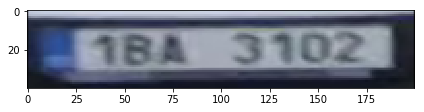

In [43]:
skimage.io.imshow(trainX[100]*255)

In [37]:
trainY.shape

(105671, 8, 39)

In [ ]:
n_epoch =120
start = timeit.default_timer()
history=model.fit(trainX,[trainY[:,0,:],trainY[:,1,:],trainY[:,2,:],trainY[:,3,:],trainY[:,4,:],trainY[:,5,:],trainY[:,6,:],trainY[:,7,:]], epochs=n_epoch,batch_size=64, shuffle=False,verbose=1)
stop = timeit.default_timer()

print('Time: ', stop - start)  
license=0
total_license=0
character =0 
total_character=0
for n in range(0,len(testX)):
    p=model.predict_on_batch(testX[n:n+1])
    truth = testY[n]
    
    for x in range(0,8):
        total_character+=1
        if int_to_char[argmax(truth[x])]==int_to_char[argmax(p[x])]:
            character+=1
    total_license+=1
    if (int_to_char[argmax(truth[0])]==int_to_char[argmax(p[0])] and
        int_to_char[argmax(truth[1])]==int_to_char[argmax(p[1])] and
        int_to_char[argmax(truth[2])]==int_to_char[argmax(p[2])] and 
        int_to_char[argmax(truth[3])]==int_to_char[argmax(p[3])] and
        int_to_char[argmax(truth[4])]==int_to_char[argmax(p[4])] and
        int_to_char[argmax(truth[5])]==int_to_char[argmax(p[5])] and
        int_to_char[argmax(truth[6])]==int_to_char[argmax(p[6])] and
        int_to_char[argmax(truth[7])]==int_to_char[argmax(p[7])]):
        license+=1
LP_acc1=license/total_license  
character_acc1=character/total_character
print("license acc",LP_acc1) 
print("character",character_acc1)

Epoch 1/120
   260/105671 [..............................] - ETA: 37:34 - loss: 9.5367e-07 - dense_33_loss: 1.1921e-07 - dense_34_loss: 1.1921e-07 - dense_35_loss: 1.1921e-07 - dense_36_loss: 1.1921e-07 - dense_37_loss: 1.1921e-07 - dense_38_loss: 1.1921e-07 - dense_39_loss: 1.1921e-07 - dense_40_loss: 1.1921e-07 - dense_33_acc: 1.0000 - dense_34_acc: 1.0000 - dense_35_acc: 1.0000 - dense_36_acc: 1.0000 - dense_37_acc: 1.0000 - dense_38_acc: 1.0000 - dense_39_acc: 1.0000 - dense_40_acc: 1.0000

In [298]:
print('Time: ', stop - start)#126hours totally

Time:  272316.9337254013


In [297]:
print("license acc",LP_acc1) 
print("character",character_acc1)

license acc 0.949040153365372
character 0.9886600882376113


In [296]:
import os
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'resNet_LP_cz_paper_epoch'+n_epoch+'.h5'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/tang/targa/exp5/saved_models/resNet_LP_cz_paper_epoch200.h5 


In [294]:
print("license acc",LP_acc1) 
print("character",character_acc1)

license acc 0.9496178996297172
character 0.9888012421544683


In [64]:
# Score trained model.
scores = model.evaluate(testX,[testY[:,0,:],testY[:,1,:],testY[:,2,:],testY[:,3,:],testY[:,4,:],testY[:,5,:],testY[:,6,:],testY[:,7,:]], verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 86.70043980875869
Test accuracy: 12.587909406754001


In [299]:
print('train loss:', train_scores[0])
print('train accuracy:', train_scores[1])

train loss: 3.025700428855293
train accuracy: 0.21868994488331123


In [301]:
#result=model.predict(testX, batch_size=10, verbose=1)

In [302]:
#train_result=model.predict(trainX, verbose=1)

In [248]:
a=testX[998:999].reshape((40,200,3))

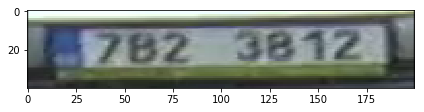

In [249]:
skimage.io.imshow(a*255)

In [254]:
for ttt in testY[998]:
    print(int_to_char[argmax(ttt)])

7
B
2
#
3
8
1
2


In [250]:
for ttt in p:
    print(int_to_char[argmax(ttt)])

7
B
3
#
3
8
1
2


In [251]:
len(train_result),len(trainX)

(8, 105671)

In [117]:
train_result[0].shape

(105671, 39)

In [114]:
trial = np.reshape(train_result,(len(trainX),8,39))

In [139]:
train_result[0][0][:].shape

(39,)

In [152]:
t=train_result[0:8][0][:]
print(ttt)

[5.95658505e-14 8.30352172e-13 1.25841882e-13 9.99485612e-01
 4.49970097e-20 1.62267443e-12 4.69089267e-10 2.92906335e-19
 1.48150536e-16 3.05200028e-12 8.47787669e-21 4.51341731e-21
 1.35797040e-10 6.02893446e-15 2.04812841e-05 1.12663292e-21
 7.55347519e-22 3.19384601e-13 1.81225221e-23 5.21319133e-15
 1.40764655e-23 4.43473546e-04 8.56309447e-22 1.84232577e-12
 3.84009874e-14 1.02450754e-23 3.31188612e-15 4.80955174e-13
 4.15530854e-09 5.68969045e-22 5.52515032e-20 7.02419804e-21
 4.69789831e-16 1.04718480e-14 7.68651771e-14 1.22129127e-13
 5.03933989e-05 2.53577799e-15 3.16185589e-20]


In [54]:
with open('trainVal.csv','r') as csvFile:
    reader = csv.reader(csvFile,dialect='myDialect')
    for row in reader:
#         if row[3]=='1':
#             img=skimage.data.imread(row[1])
#             img = skimage.transform.resize(img,(40,200,3))
            
            
#             #### face different length of license
#             x_trainLabel=str(row[2])
#             if len(x_trainLabel)==7:
#                 trainImages.append(img)
#                 trainLabels.append(x_trainLabel[0:3]+'#'+x_trainLabel[3:])
#             if len(x_trainLabel)==6:
#                 trainImages.append(img)
#                 trainLabels.append(x_trainLabel[0:3]+'..'+x_trainLabel[3:])
#             if len(x_trainLabel)==5:
#                 trainImages.append(img)
#                 trainLabels.append(x_trainLabel[0]+'###'+x_trainLabel[1:])
                
        if row[3]=='0':
            img=skimage.data.imread(row[1])
            img = skimage.transform.resize(img,(40,200,3))
            
            
            x_testLabel=str(row[2])
            if len(x_testLabel)==7:
                testImages.append(img)
                testLabels.append(x_testLabel[0:3]+'#'+x_testLabel[3:])
            if len(x_testLabel)==6:
                testImages.append(img)
                testLabels.append(x_testLabel[0:3]+'..'+x_testLabel[3:])
            if len(x_trainLabel)==5:
                testImages.append(img)
                testLabels.append(x_testLabel[0]+'###'+x_testLabel[1:])
        
        #print(row,row[3])

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [55]:
list_testLabels=list()
for testlabel in testLabels:
    test_encoded = [char_to_int[char] for char in testlabel]
    for value in test_encoded:
        letter = [0 for _ in range(len(alphabet))]
        letter[value] = 1
        list_testLabels.append(letter)

In [59]:
testY=np.array(list_testLabels)
testX=np.array(testImages)

In [60]:
testY=testY.reshape(len(testLabels),8,39)
testX=testX.reshape(len(testImages),testImages[0].shape[0],
                           testImages[0].shape[1],
                           testImages[0].shape[2]).astype("float32")/255

In [62]:
del testImages
del list_testLabels